In [109]:
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
import numpy as np
%matplotlib inline

In [110]:
import os
files = os.listdir("Data")

In [111]:
df_main = pd.DataFrame()


In [112]:
def Cleaned (clean: str):
    try:
        clean = clean.replace(",", "")
        clean = clean.replace(" ", "")    
    except AttributeError:
        pass
    return clean

In [113]:
for file in files:
    df = pd.read_csv(f"Data/{file}")
    print(df.isnull().values.any())
    df_main =  df_main.append(df, ignore_index=True)

False
False
False
False
True
False
False
False
False


C:\Users\joogu\AppData\Local\Temp\ipykernel_2652\2289976599.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main =  df_main.append(df, ignore_index=True)
C:\Users\joogu\AppData\Local\Temp\ipykernel_2652\2289976599.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main =  df_main.append(df, ignore_index=True)
C:\Users\joogu\AppData\Local\Temp\ipykernel_2652\2289976599.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main =  df_main.append(df, ignore_index=True)
C:\Users\joogu\AppData\Local\Temp\ipykernel_2652\2289976599.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main =  df_main.append(df, ignore_index=True)


False
False
False
False
False


C:\Users\joogu\AppData\Local\Temp\ipykernel_2652\2289976599.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main =  df_main.append(df, ignore_index=True)
C:\Users\joogu\AppData\Local\Temp\ipykernel_2652\2289976599.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main =  df_main.append(df, ignore_index=True)
C:\Users\joogu\AppData\Local\Temp\ipykernel_2652\2289976599.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main =  df_main.append(df, ignore_index=True)
C:\Users\joogu\AppData\Local\Temp\ipykernel_2652\2289976599.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main =  df_main.append(df, ignore_index=True)


In [114]:
df_main.pop("Unnamed: 0")

0         0.0
1         1.0
2         2.0
3         3.0
4         4.0
        ...  
2684    216.0
2685    217.0
2686    218.0
2687    219.0
2688    220.0
Name: Unnamed: 0, Length: 2689, dtype: float64

In [115]:
df_main.head()

,BUDGETYEAR,BUDGET CATEGORY,TYPE OF EXPENDITURE,GOVERNMENT AGENCY,ESTIMATED BUDGET
0,2010.0,STATUTORY,NON RECURRENT EXPENDITURE,NATIONAL JUDICIAL COUNCIL,91000000000.0
1,2010.0,STATUTORY,NON RECURRENT EXPENDITURE,NIGER-DELTA DEVELOPMENT COMMISSION,35624771198.0
2,2010.0,STATUTORY,NON RECURRENT EXPENDITURE,NDDC ARREARS OF SHARE OF EXCESS CRUDE DISTRIBU...,9312986292.0
3,2010.0,STATUTORY,NON RECURRENT EXPENDITURE,UNIVERSAL BASIC EDUCATION,44341401504.0
4,2010.0,DEBT SERVICE,NON RECURRENT EXPENDITURE,DOMESTIC DEBTS,478155330805.0


In [116]:
df_main['BUDGETYEAR'] = df_main['BUDGETYEAR'].astype(int)
df_main.head()

,BUDGETYEAR,BUDGET CATEGORY,TYPE OF EXPENDITURE,GOVERNMENT AGENCY,ESTIMATED BUDGET
0,2010,STATUTORY,NON RECURRENT EXPENDITURE,NATIONAL JUDICIAL COUNCIL,91000000000.0
1,2010,STATUTORY,NON RECURRENT EXPENDITURE,NIGER-DELTA DEVELOPMENT COMMISSION,35624771198.0
2,2010,STATUTORY,NON RECURRENT EXPENDITURE,NDDC ARREARS OF SHARE OF EXCESS CRUDE DISTRIBU...,9312986292.0
3,2010,STATUTORY,NON RECURRENT EXPENDITURE,UNIVERSAL BASIC EDUCATION,44341401504.0
4,2010,DEBT SERVICE,NON RECURRENT EXPENDITURE,DOMESTIC DEBTS,478155330805.0


In [117]:
df_main.tail()
for coll in df_main.columns:
    print(coll)
df_main.rename(columns = {'ESTIMATED BUDGET':'TOTAL BUDGET'}, inplace=True)

BUDGETYEAR
BUDGET CATEGORY
TYPE OF EXPENDITURE
GOVERNMENT AGENCY
ESTIMATED BUDGET


In [118]:
df_main.isnull().sum()

BUDGETYEAR             0
BUDGET CATEGORY        1
TYPE OF EXPENDITURE    0
GOVERNMENT AGENCY      0
TOTAL BUDGET           0
dtype: int64

In [119]:
df_main = df_main.fillna(0)


In [120]:
df_main.isnull().sum()

BUDGETYEAR             0
BUDGET CATEGORY        0
TYPE OF EXPENDITURE    0
GOVERNMENT AGENCY      0
TOTAL BUDGET           0
dtype: int64

In [121]:
df_main["TOTAL BUDGET"] = df_main["TOTAL BUDGET"].apply(Cleaned)

In [122]:
df_main.head()

,BUDGETYEAR,BUDGET CATEGORY,TYPE OF EXPENDITURE,GOVERNMENT AGENCY,TOTAL BUDGET
0,2010,STATUTORY,NON RECURRENT EXPENDITURE,NATIONAL JUDICIAL COUNCIL,91000000000.0
1,2010,STATUTORY,NON RECURRENT EXPENDITURE,NIGER-DELTA DEVELOPMENT COMMISSION,35624771198.0
2,2010,STATUTORY,NON RECURRENT EXPENDITURE,NDDC ARREARS OF SHARE OF EXCESS CRUDE DISTRIBU...,9312986292.0
3,2010,STATUTORY,NON RECURRENT EXPENDITURE,UNIVERSAL BASIC EDUCATION,44341401504.0
4,2010,DEBT SERVICE,NON RECURRENT EXPENDITURE,DOMESTIC DEBTS,478155330805.0


In [123]:
col = ['Unnamed: 0', 'BUDGETYEAR', 'BUDGET CATEGORY', 'TYPE OF EXPENDITURE',
       'GOVERNMENT AGENCY', 'TOTAL BUDGET']
government_agency = col[4]
expenditure_type = col[3]
budget_category = col[2]
budget_year = col[1]
budget_amount = col[5]


In [124]:
df_main[budget_year].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022])

In [125]:
df_temp  = df_main[[budget_year, budget_amount]]
# df_main.groupby([year]).sum()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BUDGETYEAR    2689 non-null   int32 
 1   TOTAL BUDGET  2689 non-null   object
dtypes: int32(1), object(1)
memory usage: 31.6+ KB


In [126]:
df_temp[budget_year] = df_temp[budget_year].astype(int)

C:\Users\joogu\AppData\Local\Temp\ipykernel_2652\269803411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[budget_year] = df_temp[budget_year].astype(int)


In [127]:
from math import floor

def divide(val):
    # val = float(val)
    # print(val)
    # divisor = 10000000000
    # d = floor(val / divisor)
    # return int(d)
    return float(val)

In [128]:
df_temp[budget_amount] = df_temp[budget_amount].apply(divide)


C:\Users\joogu\AppData\Local\Temp\ipykernel_2652\3575314723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[budget_amount] = df_temp[budget_amount].apply(divide)


In [129]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BUDGETYEAR    2689 non-null   int32  
 1   TOTAL BUDGET  2689 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 31.6 KB


In [130]:
df_grouped = df_temp.groupby([budget_year]).sum()
df_grouped


,TOTAL BUDGET
BUDGETYEAR,
2010,4.250801e+12
2011,7.948285e+12
2012,4.869293e+12
2013,5.150311e+12
2014,5.214118e+12
2015,5.161699e+12
2016,6.171679e+12
2017,8.439269e+12
2018,8.653561e+12


In [131]:
df_grouped = pd.read_csv("allbudget.csv")
df_grouped.rename(columns = {'ESTIMATED BUDGET':'TOTAL BUDGET'}, inplace=True)

<AxesSubplot:title={'center':'Line Chart'}, xlabel='BUDGETYEAR'>

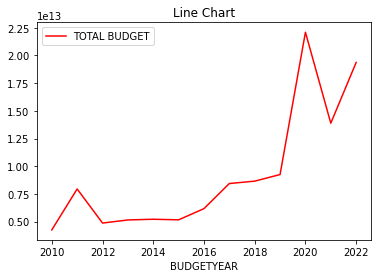

In [132]:
from turtle import title


df_grouped.head()
df_grouped.plot(budget_year, budget_amount, color="red", title = 'Line Chart')

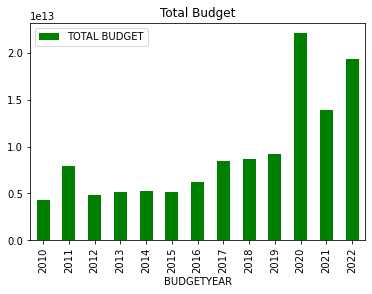

In [133]:
axes = df_grouped.plot.bar(budget_year, budget_amount, color="green", title = 'Total Budget')

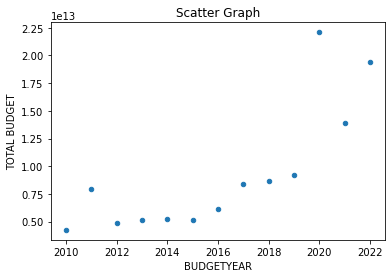

In [134]:
from turtle import title


df_grouped.plot(budget_year, budget_amount, kind = 'scatter', title = 'Scatter Graph')
plt.show()

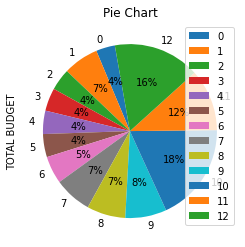

In [135]:
from turtle import color, title
from matplotlib import colors
df_grouped.plot(budget_year, budget_amount, kind = 'pie', autopct='%1.0f%%', startangle=100, title = 'Pie Chart')
plt.show()

In [136]:
df_grouped.columns

Index(['BUDGETYEAR', 'TOTAL BUDGET'], dtype='object')

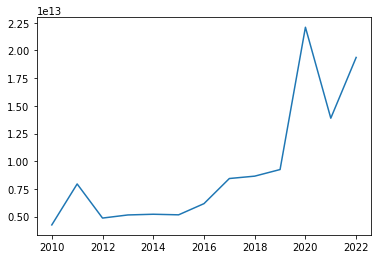

In [137]:
plt.plot(df_grouped[budget_year], df_grouped[budget_amount])

<AxesSubplot:>

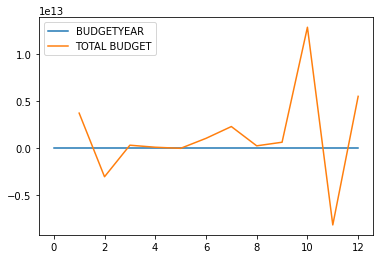

In [138]:
# yt = yt - y(t-1)
df = df_grouped
df['TOTAL BUDGET'] =  df['TOTAL BUDGET'] - df['TOTAL BUDGET'].shift(1)
df.plot()

In [139]:
from prophet import Prophet 

In [140]:
m = Prophet()
# 2010-01-01

In [141]:
def change_year_to_format(year):
    year = str(year)
    return year + "-01-01"

In [142]:
df_grouped[budget_year] = df_grouped[budget_year].apply(change_year_to_format)

In [143]:
df_grouped.head()

,BUDGETYEAR,TOTAL BUDGET
0,2010-01-01,NaN
1,2011-01-01,3.697484e+12
2,2012-01-01,-3.078991e+12
3,2013-01-01,2.810174e+11
4,2014-01-01,6.380703e+10


In [144]:
df_grouped[budget_year] = pd.to_datetime(df_grouped[budget_year])

In [145]:
df_grouped.head()

,BUDGETYEAR,TOTAL BUDGET
0,2010-01-01,NaN
1,2011-01-01,3.697484e+12
2,2012-01-01,-3.078991e+12
3,2013-01-01,2.810174e+11
4,2014-01-01,6.380703e+10


In [146]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   BUDGETYEAR    13 non-null     datetime64[ns]
 1   TOTAL BUDGET  12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.0 bytes


In [147]:
df_grouped.rename(columns = {budget_year:'ds', budget_amount:'y'}, inplace = True)

In [148]:
df_grouped.fillna(0, inplace=True)

In [149]:
df_ = df_grouped
df = df_grouped

In [150]:
df.head()

,ds,y
0,2010-01-01,0.000000e+00
1,2011-01-01,3.697484e+12
2,2012-01-01,-3.078991e+12
3,2013-01-01,2.810174e+11
4,2014-01-01,6.380703e+10


In [151]:
m.fit(df)

14:13:45 - cmdstanpy - INFO - Chain [1] start processing
14:13:45 - cmdstanpy - INFO - Chain [1] done processing


In [152]:
future = m.make_future_dataframe(periods=3, freq="Y")
# future.head()
future.tail()

,ds
11,2021-01-01
12,2022-01-01
13,2022-12-31
14,2023-12-31
15,2024-12-31


In [153]:
forecast = m.predict(future)
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
11,2021-01-01,2.504930e+12,-5.374618e+12,5.084155e+12,2.504930e+12,2.504930e+12,-2.468942e+12,-2.468942e+12,-2.468942e+12,-2.468942e+12,-2.468942e+12,-2.468942e+12,0.0,0.0,0.0,3.598815e+10
12,2022-01-01,2.782011e+12,-3.341650e+12,7.077975e+12,2.782011e+12,2.782011e+12,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,0.0,0.0,0.0,2.033123e+12
13,2022-12-31,3.058331e+12,5.805073e+12,1.587253e+13,3.058331e+12,3.058331e+12,7.658670e+12,7.658670e+12,7.658670e+12,7.658670e+12,7.658670e+12,7.658670e+12,0.0,0.0,0.0,1.071700e+13
14,2023-12-31,3.335411e+12,6.960399e+12,1.778661e+13,3.335411e+12,3.335411e+12,9.287419e+12,9.287419e+12,9.287419e+12,9.287419e+12,9.287419e+12,9.287419e+12,0.0,0.0,0.0,1.262283e+13
15,2024-12-31,3.613251e+12,2.671378e+12,1.329674e+13,3.613251e+12,3.613251e+12,4.342392e+12,4.342392e+12,4.342392e+12,4.342392e+12,4.342392e+12,4.342392e+12,0.0,0.0,0.0,7.955643e+12


In [154]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,-5.452273e+11,-6.367149e+12,3.938230e+12,-5.452273e+11,-5.452273e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,0.0,0.0,0.0,-1.294115e+12
1,2011-01-01,-2.681472e+11,-4.526003e+12,5.804516e+12,-2.681472e+11,-2.681472e+11,9.610687e+11,9.610687e+11,9.610687e+11,9.610687e+11,9.610687e+11,9.610687e+11,0.0,0.0,0.0,6.929214e+11
2,2012-01-01,8.932811e+09,-2.720974e+12,7.719471e+12,8.932811e+09,8.932811e+09,2.658848e+12,2.658848e+12,2.658848e+12,2.658848e+12,2.658848e+12,2.658848e+12,0.0,0.0,0.0,2.667781e+12
3,2013-01-01,2.867720e+11,-7.179155e+12,2.843412e+12,2.867720e+11,2.867720e+11,-2.468942e+12,-2.468942e+12,-2.468942e+12,-2.468942e+12,-2.468942e+12,-2.468942e+12,0.0,0.0,0.0,-2.182170e+12
4,2014-01-01,5.638520e+11,-5.702782e+12,4.625549e+12,5.638520e+11,5.638520e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,0.0,0.0,0.0,-1.850357e+11


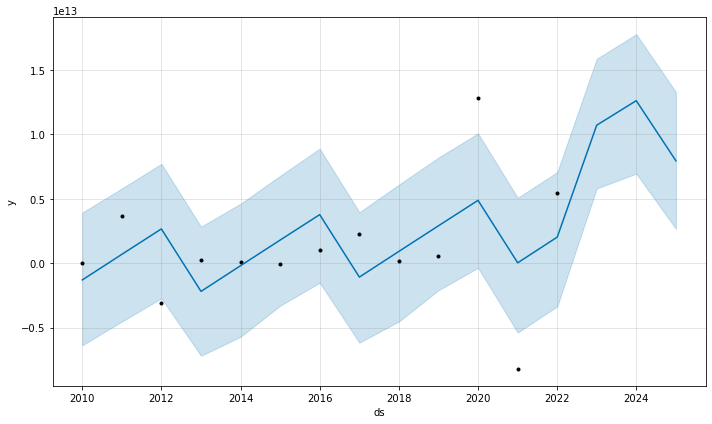

In [155]:
fig1 = m.plot(forecast)

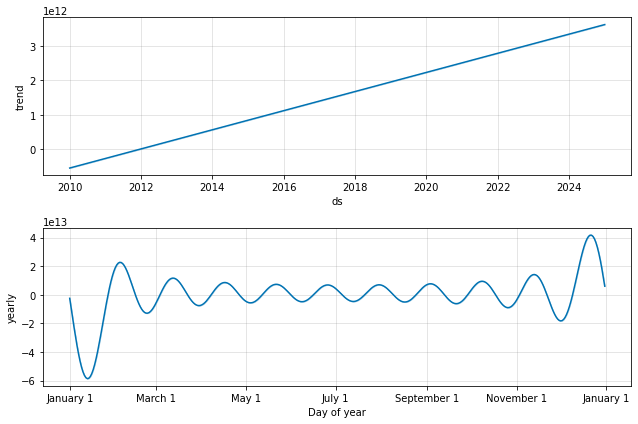

In [156]:
fig2 = m.plot_components(forecast)

In [157]:
from prophet.diagnostics import cross_validation

In [195]:
cv = cross_validation(m, initial= '250 days', period='180 days', horizon='365 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/21 [00:00<?, ?it/s]

14:52:58 - cmdstanpy - INFO - Chain [1] start processing
14:52:58 - cmdstanpy - INFO - Chain [1] done processing
14:53:01 - cmdstanpy - INFO - Chain [1] start processing
14:53:01 - cmdstanpy - INFO - Chain [1] done processing
14:53:02 - cmdstanpy - INFO - Chain [1] start processing
14:53:02 - cmdstanpy - INFO - Chain [1] done processing
14:53:04 - cmdstanpy - INFO - Chain [1] start processing
14:53:04 - cmdstanpy - INFO - Chain [1] done processing
14:53:05 - cmdstanpy - INFO - Chain [1] start processing
14:53:05 - cmdstanpy - INFO - Chain [1] done processing
14:53:06 - cmdstanpy - INFO - Chain [1] start processing
14:53:06 - cmdstanpy - INFO - Chain [1] done processing
14:53:08 - cmdstanpy - INFO - Chain [1] start processing
14:53:08 - cmdstanpy - INFO - Chain [1] done processing
14:53:09 - cmdstanpy - INFO - Chain [1] start processing
14:53:09 - cmdstanpy - INFO - Chain [1] done processing
14:53:10 - cmdstanpy - INFO - Chain [1] start processing
14:53:11 - cmdstanpy - INFO - Chain [1]

In [196]:
cv.tail(50)
#df.shape

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-01-01,7.399360e+12,7.399360e+12,7.399360e+12,-3.078991e+12,2011-02-23
1,2012-01-01,7.399360e+12,7.399360e+12,7.399360e+12,-3.078991e+12,2011-08-22
2,2013-01-01,-2.203808e+12,-5.048500e+12,3.571420e+11,2.810174e+11,2012-02-18
3,2013-01-01,-2.203808e+12,-4.744729e+12,5.535580e+11,2.810174e+11,2012-08-16
4,2014-01-01,-1.203123e+12,-3.409573e+12,1.231111e+12,6.380703e+10,2013-02-12
5,2014-01-01,-1.203123e+12,-3.487063e+12,1.296928e+12,6.380703e+10,2013-08-11
6,2015-01-01,-1.634602e+12,-3.883753e+12,6.812785e+11,-5.241844e+10,2014-02-07
7,2015-01-01,-1.634602e+12,-4.013133e+12,7.831282e+11,-5.241844e+10,2014-08-06
8,2016-01-01,-1.540824e+12,-3.894903e+12,7.631339e+11,1.009980e+12,2015-02-02
9,2016-01-01,-1.540824e+12,-3.753711e+12,7.884012e+11,1.009980e+12,2015-08-01


In [179]:
from prophet.diagnostics import performance_metrics

In [180]:
df_pm = performance_metrics(cv)


In [183]:
df_pm.head(50)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,138 days,5.798510e+25,7.614795e+12,6.481588e+12,6.122713,6.122713,2.000000,0.0
1,143 days,3.889736e+24,1.972241e+12,1.875878e+12,14.348951,14.348951,2.000000,0.5
2,148 days,2.054209e+24,1.433251e+12,1.424557e+12,25.019690,25.019690,1.937857,1.0
3,153 days,4.504952e+24,2.122487e+12,2.066494e+12,16.354662,16.354662,1.937857,0.5
4,159 days,4.466077e+24,2.113309e+12,2.054111e+12,1.606208,1.606208,1.523017,0.5
5,164 days,1.777206e+24,1.333119e+12,1.309948e+12,2.822447,2.822447,1.235581,1.0
6,169 days,5.758499e+23,7.588477e+11,6.068067e+11,2.605686,2.605686,0.857577,1.0
7,174 days,8.126903e+25,9.014934e+12,6.449641e+12,0.622845,0.622845,1.129919,0.5
8,180 days,1.550520e+26,1.245199e+13,1.244838e+13,1.236017,1.236017,1.984906,0.0
9,312 days,1.286923e+26,1.134426e+13,1.131348e+13,2.441408,2.441408,2.000000,0.0


In [166]:
from prophet.plot import plot_cross_validation_metric

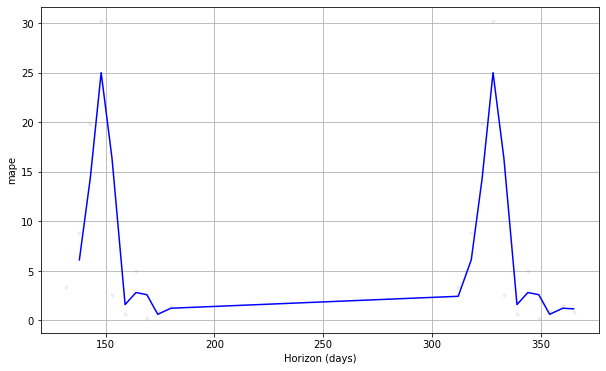

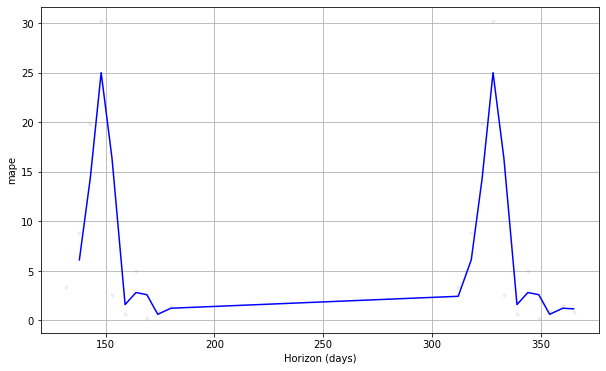

In [173]:
plot_cross_validation_metric(cv, metric='mape')

In [ ]:
model = Prophet()

df_.drop(df_.tail(2).index,inplace=True) 
df_.tail()

In [ ]:
df_.head()

In [ ]:
model.fit(df_)
future = model.make_future_dataframe(periods=3, freq="Y")
# future.head()
future.tail()

In [ ]:
forecast = model.predict(future)
forecast.tail()

In [ ]:
forecast.head()


In [ ]:
fig1_ = model.plot(forecast)


In [ ]:
# group by categories . 
df_main[expenditure_type].unique()

In [ ]:
df_main.replace({'RECURRENT (NON DEBT) EXPENDITURE':'RECURRENT (NON-DEBT) EXPENDITURE'}, inplace=True)
df_main.replace({'RECURRENT(NON DEBT)  EXPENDITURE':'RECURRENT (NON-DEBT) EXPENDITURE'}, inplace=True)

In [ ]:
df_main[expenditure_type].unique()

In [ ]:
df_main.head()

In [ ]:
df_expenditure = df_main[[budget_year, expenditure_type, budget_amount]]
df_expenditure.head()

In [ ]:
df_expenditure = df_expenditure.groupby(budget_year)
# split the grouped dataframe into a list of dataframes by their year. 
all_expenditure_dfs = [df_expenditure.get_group(x) for x in df_expenditure.groups]

In [ ]:
all_expenditure_dfs[0].head()

In [ ]:
# use a for loop to acomplish this later 
new_df_expenditure = []
df_expenditures = pd.DataFrame()

for dataframe in all_expenditure_dfs:
    dataframes_year = dataframe[budget_year].iloc[0]
    dataframe = dataframe.groupby(expenditure_type).sum()
    dataframe["year"] = dataframes_year
    df_expenditures =  df_expenditures.append(dataframe)



In [ ]:
df_expenditures.head()

In [ ]:
df_expenditures[expenditure_type] = df_expenditures.index
df_expenditures.head()
# drop the inxed or make values. 

In [ ]:
df_expenditures[expenditure_type].unique()

In [ ]:
len(df_expenditures)

In [ ]:
unique_expenditures = ['CAPITAL EXPENDITURE', 'NON RECURRENT  EXPENDITURE',
       'RECURRENT  EXPENDITURE', 'RECURRENT (NON-DEBT) EXPENDITURE',
       'SUBSIDY RE-INVESTMENT']       

In [ ]:
list_of_unique_expenditures = []
for unique_expenditure in unique_expenditures: 
    # filter by type 
    df_expenditure_ = df_expenditures[df_expenditures[expenditure_type] == unique_expenditure]
    # make a plot 
    df_expenditure_.rename(columns={"BUDGETYEAR": "Total Budget"}, inplace=True)
    list_of_unique_expenditures.append(df_expenditure_)
    # add plot to a list. 

In [ ]:
# 1. Add header 
# 2. Add function 
# 3. Add plots. 
# 4. Plot all together
for df in list_of_unique_expenditures:
    header = df.index[0]
    axes = df.plot.bar("year", "Total Budget", color="green", title=header)


In [ ]:
def get_expenditure_by_year(year, df_expenditures=df_expenditures):
    year = float(year)
    return df_expenditures[df_expenditures["year"] == year]

In [ ]:
df_expenditure_2022 = get_expenditure_by_year(2022)
df_expenditure_2022

In [ ]:
df_main[budget_category].unique()

In [ ]:
df_budget_categories = df_main[[budget_year, budget_category, budget_amount]]

df_budget_categories = df_budget_categories.groupby(budget_year)
# split the grouped dataframe into a list of dataframes by their year. 
all_category_dfs = [df_budget_categories.get_group(x) for x in df_budget_categories.groups]

In [ ]:
# use a for loop to acomplish this later 
new_df_category = []
df_budget_categories = pd.DataFrame()

for dataframe in all_category_dfs:
    dataframes_year = dataframe[budget_year].iloc[0]
    dataframe = dataframe.groupby(budget_category).sum()
    dataframe["year"] = dataframes_year
    df_budget_categories =  df_budget_categories.append(dataframe)

In [ ]:
df_budget_categories[budget_category] = df_budget_categories.index
df_budget_categories.head()

In [ ]:
unique_categories = df_budget_categories[budget_category].unique()
list_of_unique_categories = []
for unique_category in unique_categories: 
    # filter by type 
    df_budget_category_ = df_budget_categories[df_budget_categories[budget_category] == unique_category]
    # make a plot 
    df_budget_category_.rename(columns={"BUDGETYEAR": "Total Budget"}, inplace=True)
    list_of_unique_categories.append(df_budget_category_)
    # add plot to a list. 

In [ ]:
for df in list_of_unique_categories:
    header = df.index[0]
    axes = df.plot.bar("year", "Total Budget", color="red", title=header)

In [ ]:
df_main[df_main["BUDGETYEAR"] == 2020]


In [ ]:
df_20 = df_main[df_main["BUDGETYEAR"] == 2020]
df_20.head()

In [ ]:
df_20.info()

In [ ]:
df_20[budget_amount] = df_20[budget_amount].astype(float)

In [ ]:
df_20_group = df_20.groupby([budget_category])[budget_amount].sum()

In [ ]:
df_20_group

In [ ]:
axes = df_20_group.plot.bar(budget_year, budget_category, color="green")